In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
actual_frequencies_file = '../frequencies/source/southeast_asia_serotype_frequencies.csv'
fitness_file = '../frequencies/southeast_asia/serotype/serotypeseAsia_serotype_fitness.csv'
predicted_frequencies_file = '../frequencies/southeast_asia/serotype/serotypeseAsia_serotype_predicted_freqs.csv'

In [3]:
actual_frequencies = pd.read_csv(actual_frequencies_file, index_col=0)
predicted_frequencies = pd.read_csv(predicted_frequencies_file, index_col=0)
fitness = pd.read_csv(fitness_file, index_col=0)

colors = pickle.load(open('./colors.p', 'rb'))
names = pickle.load(open('./names.p', 'rb'))

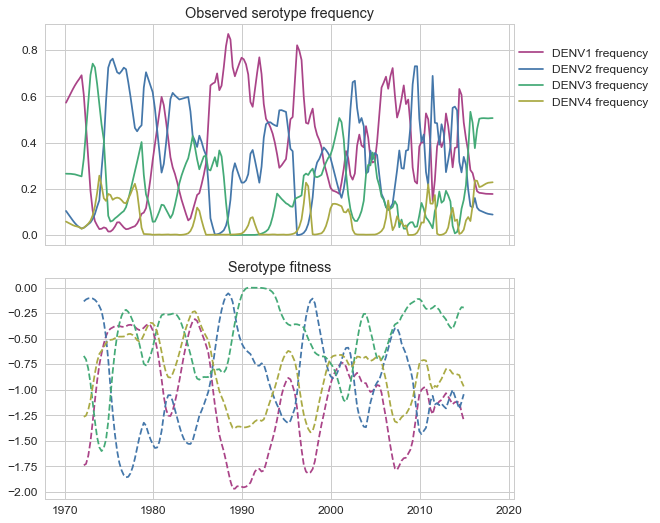

In [5]:
sns.set(style='whitegrid', font_scale=1.2)
def plot_fitness_v_frequency(actual_frequencies, fitness, clade_type='serotype'):
    fig, axes = plt.subplots(2,1,figsize=(7.5,7.5), sharex=True)

    for clade in sorted(fitness.columns.values):
        if clade.isdigit():
            clade_name = names[clade].replace('_', '-')
        else:
            clade_name = clade
        
        if clade_type == 'serotype':
            c = colors[clade_name.lower()]
        else:
            c = 'k'
        axes[1].plot(fitness[clade].index.values, fitness[clade], linestyle='--', label='%s fitness'%clade_name, color=c)
        axes[0].plot(actual_frequencies[clade].index.values, actual_frequencies[clade], linestyle='-', label='%s frequency'%clade_name,color=c)

    axes[1].set_title('%s fitness'%clade_type.capitalize())
    axes[0].set_title('Observed %s frequency'%clade_type)
    plt.sca(axes[0])
    plt.legend(loc=(1,0.6))
    plt.tight_layout()
    
plot_fitness_v_frequency(actual_frequencies, fitness)
plt.savefig('./png/serotype_fitness.png', dpi=300, bbox_inches='tight')
